# Selection sort algorithm

<ol>
  <li>Get the length of the array.</li>
  <li>Loop through the array n - 1 times (Python), where n is the length of the array.</li>
  <li>In each iteration of the outer loop, initialize min_index to the current index.</li>
  <li>Loop through the rest of the unsorted portion of the array.</li>
  <li>In each iteration of the inner loop, compare the current value with the current minimum value.</li>
  <li>If the current value is less than the current minimum, update min_index with the index of the current value.</li>
  <li>After the inner loop is completed, check if the minimum value is not at the current index.</li>
  <li>If the minimum value is not at the current index, swap the current value with the minimum value.</li>
  <li>Repeat steps 3 to 8 until all elements have been sorted.</li>
  <li>Return the sorted array.</li>
</ol>



In [7]:
def selection_sort(array):
    # Get the length of the array
    n = len(array)
    
    # Loop through the array n - 1 times
    for i in range(n - 1):
        # Initialize min_index to the current index
        min_index = i
        
        # Loop through the rest of the unsorted portion of the array
        for j in range(i + 1, n):
            # If the current value is less than the current minimum, update min_index
            if array[j] < array[min_index]:
                min_index = j
        
        # If the minimum value is not at the current index, swap the current value with the minimum value
        if min_index != i:
            array[i], array[min_index] = array[min_index], array[i]
    
    # Return the sorted array
    return array

# Complexity of the algorithm: O(n^2)

In [6]:
array=[64,25,12,22,11] # example array
sorted_array=selection_sort(array) # call to the function
print(sorted_array) # sorted array implemented selection sort algorithm

[11, 12, 22, 25, 64]


## Write the pseudocode to insertion sort and calculate the complexity

In [8]:
def insertion_sort(array):
    # Loop through all elements in the array, starting from the second element
    for i in range(1, len(array)):
        # Assign the current element to a variable 'key_item'
        key_item = array[i]
        # Set up a variable 'j' to keep track of the position in the sorted portion of the array
        j = i - 1
        # While 'j' is not less than zero and 'key_item' is less than the element at position 'j'
        while j >= 0 and key_item < array[j]:
            # Shift the element at position 'j' one position to the right
            array[j + 1] = array[j]
            # Decrement 'j' to move left one position in the sorted portion
            j -= 1
        # Insert 'key_item' into the correct position in the sorted portion
        array[j + 1] = key_item
    # Return the sorted array
    return array

# Complexity of the algorithm: O(n^2)

array = [4,6,1,7,2,5]# example array
sorted_array=selection_sort(array) # call to the function
print(sorted_array) # sorted array implemented selection sort algorithm



[1, 2, 4, 5, 6, 7]


## Write the pseudocode of a method that given a number n, returns the list of fibonacci numbers, from 0 to n. Calculate the complexity

In [13]:
def fibonacci_sequence(n):
    # Initialize the list to store the fibonacci numbers
    fib_list = []
    # The first two fibonacci numbers are 0 and 1
    a, b = 0, 1
    # Loop until the next number in the sequence is greater than n
    while b <= n:
        # Append the next number in the sequence to the list
        fib_list.append(b)
        # Generate the next number in the sequence
        a, b = b, a + b
    # Return the list of fibonacci numbers
    return fib_list

# Complexity of the algorithm: O(n)

fibonacci=fibonacci_sequence(1000)
print(fibonacci)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


## Write an algorithm that finds the convex hull

[[0.04121662 0.49062288]
 [0.08028682 0.80551067]
 [0.13242521 0.9685304 ]
 [0.32439958 0.99485943]
 [0.98506301 0.97068196]
 [0.94078237 0.6736039 ]
 [0.92106907 0.5669933 ]
 [0.64970132 0.1143752 ]
 [0.48416169 0.08479047]
 [0.14816637 0.11477272]
 [0.09209493 0.22858861]]


AttributeError: 'numpy.ndarray' object has no attribute 'simplices'

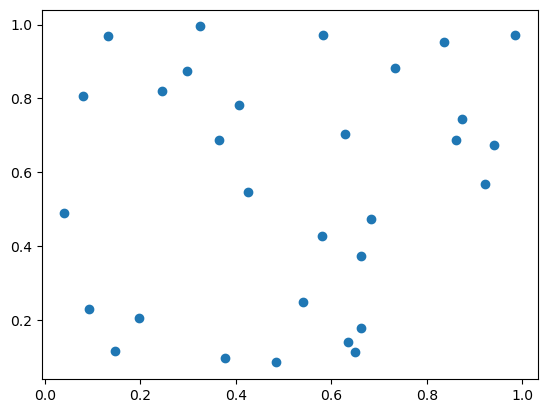

In [33]:
import numpy as np

def convex_hull(points):
    # Find the leftmost point in the set of points
    start = points[0]
    for i in range(1, len(points)):
        if points[i][0] < start[0]:
            start = points[i]

    # Initialize the list to store the points on the convex hull
    hull = [start]
    # Keep track of the current point
    current = start
    while True:
        # Initialize the next point to be the first point in the set of points
        next_point = points[0]
        # Loop through the rest of the points in the set
        for i in range(1, len(points)):
            # If the current point is the same as the next point, skip it
            if np.array_equal(points[i], current):
                continue
            # Check if the cross product of the vectors from the current point to the next point and from the current point to the current next point is positive
            cross_product = (points[i][1] - current[1]) * (next_point[0] - current[0]) - (next_point[1] - current[1]) * (points[i][0] - current[0])
            # If the cross product is positive or 0 and the next point is closer to the current point than the current next point, update the current next point
            if cross_product > 0 or (cross_product == 0 and (points[i][0] - current[0])**2 + (points[i][1] - current[1])**2 < (next_point[0] - current[0])**2 + (next_point[1] - current[1])**2):
                next_point = points[i]
        # If the next point is the same as the start point, the convex hull has been found
        if np.array_equal(next_point, start):
            break
        # Add the next point to the convex hull
        hull.append(next_point)
        # Update the current point to be the next point
        current = next_point
    # Return the convex hull
    return np.array(hull)

# Example usage:
rng = np.random.default_rng()
points = rng.random((30, 2)) 
hull = convex_hull(points)

print(hull)

import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
